In [4]:
#identificar fronteraas no lineales

In [20]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy

In [6]:
X,Y=make_circles(100,factor=.2,noise=0.2)

In [7]:
def plt_svc(model,ax=None,plot_support=True):
#plot de la funcion de decision para una clasificacion en 2D con SVC
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

#generammos la parrilla de puntos para evaluar el modelo
    xx=numpy.linspace(xlim[0],xlim[1],30)
    yy=numpy.linspace(ylim[0],ylim[1],30)
    Y, X=numpy.meshgrid(yy,xx)
    
    xy=numpy.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)

    #representacion de las fronteras y los margenes del SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])

    print(model.support_vectors_)
    print(plot_support)

    if plot_support:
        ax.scatter(
            model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            s=100,
            linewidth=1,
            facecolors="b"
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

In [8]:
def plot_svm(N=10,ax=None):
    X,Y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)

    X=X[:N]
    Y=Y[:N]
    model=SVC(kernel="linear",C=1E10)
    model.fit(X,Y)

    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model,ax)

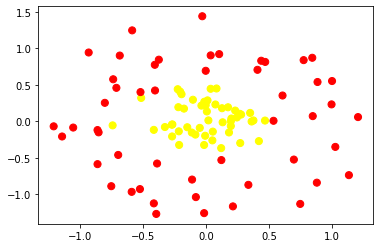

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

[[-9.32840780e-01  9.44399754e-01]
 [-5.25175180e-01 -9.27372701e-01]
 [-8.53975912e-01 -1.49829357e-01]
 [-6.98132252e-01 -4.59543963e-01]
 [-1.47832459e-02 -1.25685149e+00]
 [ 4.39263819e-01  8.31496516e-01]
 [-8.03703540e-02 -1.03715846e+00]
 [ 8.49031608e-01  7.25451787e-02]
 [-1.14439241e+00 -2.06617844e-01]
 [-4.05243927e-01  4.23914831e-01]
 [-8.62593997e-01 -1.18544372e-01]
 [-7.12549042e-01  4.60072304e-01]
 [ 1.00244698e+00  5.53479630e-01]
 [ 8.45230532e-01  8.72144273e-01]
 [-2.09834814e-03  6.93748963e-01]
 [-6.85631361e-01  9.02543850e-01]
 [-4.06939364e-01  7.75807449e-01]
 [-8.04327165e-01  2.54599259e-01]
 [ 2.14234532e-01 -1.16454626e+00]
 [-1.10609261e-01 -7.96947236e-01]
 [ 7.76557467e-01  8.39969331e-01]
 [ 1.13660681e+00 -7.36359874e-01]
 [ 8.86968609e-01  5.40204912e-01]
 [-4.14700495e-01 -1.12330416e+00]
 [ 5.37063148e-01  8.59036398e-03]
 [ 3.37143758e-01 -8.69397593e-01]
 [ 6.08781695e-01  3.55021299e-01]
 [-7.53134774e-01 -8.87684774e-01]
 [ 6.98847122e-01 -5

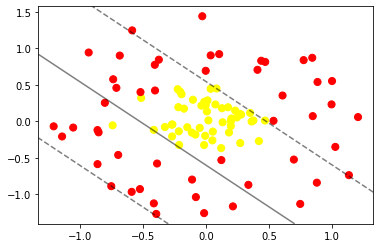

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y),plot_support=False)

In [11]:
r=numpy.exp(-(X**2).sum(1))

In [12]:
from mpl_toolkits import mplot3d

In [13]:
def plot_3D(evel=30,azim=30,X=X,Y=Y,r=r):
    ax=plt.subplot(projection="3d")
    ax.scatter(X[:,0],X[:,1],r,c=Y,s=50,cmap="autumn")
    ax.view_init(elev=evel,azim=azim)

    ax.set_xlabel("X[0")
    ax.set_ylabel("Y[1]")
    ax.set_zlabel("r")

In [14]:
from ipywidgets import interact, fixed

In [15]:
interact(plot_3D,elev=[-90,90],azim=[-180,180],X=fixed(X),Y=fixed(Y),r=fixed(r))

interactive(children=(IntSlider(value=30, description='evel', max=90, min=-30), Dropdown(description='azim', o…

<function __main__.plot_3D(evel=30, azim=30, X=array([[ 3.77496563e-01,  1.32953045e-02],
       [-9.32840780e-01,  9.44399754e-01],
       [ 1.21804814e-02,  2.88385215e-01],
       [-5.25175180e-01, -9.27372701e-01],
       [-2.69321752e-01, -2.05948911e-01],
       [-8.53975912e-01, -1.49829357e-01],
       [-6.98132252e-01, -4.59543963e-01],
       [-7.42374807e-01, -5.41045754e-02],
       [-4.94471764e-02, -8.86566733e-02],
       [-2.71455173e-01, -4.53055823e-02],
       [-1.12749834e-01, -1.52536336e-01],
       [-1.47832459e-02, -1.25685149e+00],
       [ 4.39263819e-01,  8.31496516e-01],
       [-8.03703540e-02, -1.03715846e+00],
       [ 8.49031608e-01,  7.25451787e-02],
       [-1.94396385e-01,  3.72852044e-01],
       [-1.48748659e-01, -7.97778259e-02],
       [-1.14439241e+00, -2.06617844e-01],
       [-4.05243927e-01,  4.23914831e-01],
       [-8.62593997e-01, -1.18544372e-01],
       [-7.12549042e-01,  4.60072304e-01],
       [-6.49935856e-03, -1.96614981e-01],
       

In [16]:
rbf=SVC(kernel="rbf",C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

[[-0.40524393  0.42391483]
 [-0.862594   -0.11854437]
 [-0.80432716  0.25459926]
 [ 0.53706315  0.00859036]
 [ 0.12236334 -0.52988633]
 [-0.51539191  0.32172678]
 [ 0.42066605 -0.26987667]
 [ 0.469324    0.01176312]
 [-0.22474095  0.4414813 ]]
True


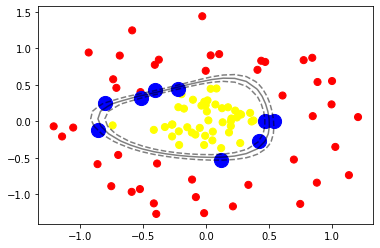

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=200,lw=1,facecolors="b")

In [18]:
#ajustar los parametrps de SVM

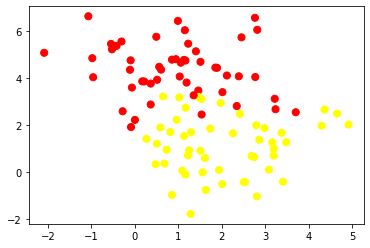

In [21]:
X,Y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

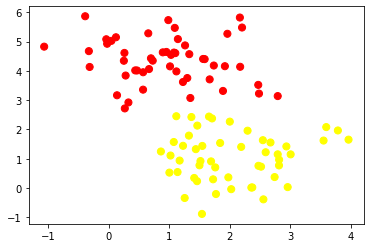

In [22]:
X,Y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
True
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]
True


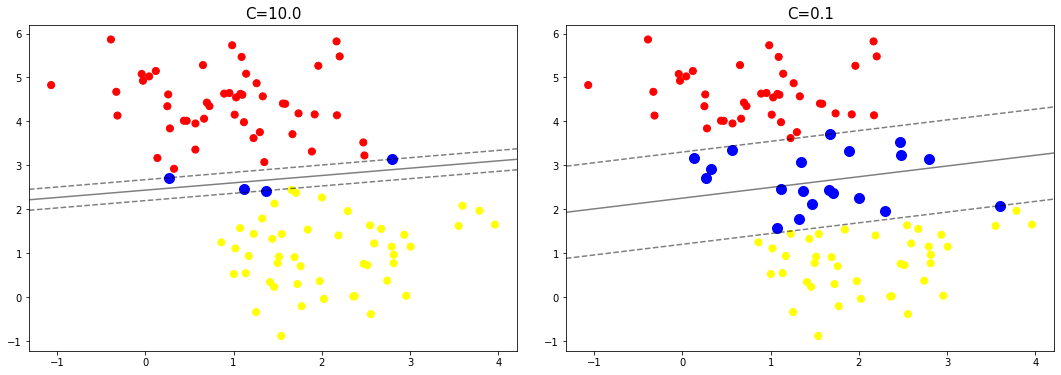

In [24]:
fig, ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.06,right=0.95,wspace=0.1)

for ax_i,C in zip(ax,[10.,0.1]):
    model=SVC(kernel="linear",C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plt_svc(model,ax_i)
    ax_i.set_title("C={0:.1f}".format(C),size=15)